In our first notebook, we performed analyses on the Google Play Store dataset. 

In this notebook, we will combine said dataset with others. We will explore the following questions: 
    
 - Are there differences, in terms of rating and the number of ratings, for an app depending on where it is published? (Google Play Store versus Apple App Store)
    - Why? Explore a particular case. 
 - Does there exist a relationship between 'positive' reviews and higher ratings? 
    - Do apps with 'positive' reviews have higher ratings than apps that do have 'negative' reviews? 
    - Are there users who have left a high rating but a 'negative' review? Why? 
    - Do ratings that are extremely positive or extremely negative garner more 'likes' than ratings that are more on the neutral side? 
    - Do users leave a mixture of positive and negative reviews, or do users leave negative reviews that are only negative or only positive?
 - If an app is mentioned in a trending YouTube video, does that increase its popularity?
    - Is there a relationship between popularity and the number of times the app is mentioned? 
    - What's more impactful: being featured in more YouTube videos, or being featured in videos with a lot of views?


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import ipywidgets as widgets
import re
import difflib
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway

In [122]:
sns.set()
palette = sns.color_palette('Set2')

In [78]:
google_apps = pd.read_csv(r'Google Play Store Apps.zip')

In [79]:
google_apps.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [80]:
google_apps.shape

(2312944, 24)

Next, we will investigate if there a difference in the number of ratings (as well as the rating itself) for identical apps published on the Google Play Store versus the Apple App Store.

In [81]:
apple_apps = pd.read_csv(r'Apple App Store Apps.zip')

In [82]:
apple_apps.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


In [83]:
apple_apps.shape

(1230376, 21)

In [84]:
apple_apps

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.00000,0,0.00000,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.00000,1,5.00000,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.00000,0,0.00000,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.00000,0,0.00000,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.00000,0,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230371,com.ledtech.sadblock,Sесurity АdBlосkеr,https://apps.apple.com/us/app/s%D0%B5%D1%81uri...,Utilities,4+,16666624.0,13.0,2020-07-07T07:00:00Z,2020-07-10T00:48:50Z,1.0.1,...,USD,True,1522287989,LED-TECHNOLOGIES,https://apps.apple.com/us/developer/led-techno...,NaN,3.91608,143,3.91608,143
1230372,com.securex.vpn,SесurеХ VРN - Wifi Proxy,https://apps.apple.com/us/app/s%D0%B5%D1%81ur%...,Utilities,4+,39016448.0,9.0,2019-02-12T10:10:13Z,2020-10-21T23:25:15Z,1.1,...,USD,True,1492288123,Trust VPN Ltd.,https://apps.apple.com/us/developer/trust-vpn-...,https://securexvpn.com/,4.82733,1500,4.82733,1500
1230373,com.beelab.SoTayXayDung,Sổ tay Xây dựng,https://apps.apple.com/us/app/s%E1%BB%95-tay-x...,Utilities,4+,17223680.0,9.0,2018-10-17T04:22:41Z,2018-10-17T04:22:41Z,1.0,...,USD,True,1438594214,Luu Minh,https://apps.apple.com/us/developer/luu-minh/i...,http://bee-labs.github.io,4.00000,1,4.00000,1
1230374,com.icc.sttb,Sổ tay đảng viên Thái Bình,https://apps.apple.com/us/app/s%E1%BB%95-tay-%...,Utilities,4+,56716288.0,10.0,2021-02-20T08:00:00Z,2021-10-02T22:00:19Z,1.2.5,...,USD,True,1515469508,Thái Bình,https://apps.apple.com/us/developer/th%C3%A1i-...,https://aisoftech.vn,0.00000,0,0.00000,0


Since apps on the Apple App Store store a separate identification ID in the url, we need to extract this because this is requred as input for scraping reviews later. 

In [85]:
pattern = re.compile(r'^.*/id(\d+).*$')
def extract_url_id(url): 
    match = pattern.match(url)
    if match: 
        return match[1]
    else: 
        return np.nan 

In [86]:
apple_apps['Url Id'] = apple_apps['AppStore_Url'].apply(lambda x: extract_url_id(x))

In [87]:
google_apps = google_apps[['App Id', 'App Name', 'Developer Id', 'Rating', 'Released', 'Rating Count']].copy()
apple_apps = apple_apps[['App_Id', 'App_Name', 'Developer', 'Current_Version_Score', 'Released', 'Reviews', 'Url Id']].copy()

In [88]:
apple_apps.rename(columns={'App_Id': 'App Id', 
                           'App_Name': 'App Name',
                           'Developer': 'Apple Developer', 
                           'Current_Version_Score': 'Apple Rating', 
                           'Released': 'Apple Released', 
                           'Reviews': 'Apple Rating Count'
                          }, 
                  errors='raise', inplace=True)

google_apps.rename(columns={'Rating': 'Google Rating', 
                            'Developer Id': 'Google Developer',
                            'Released': 'Google Released', 
                            'Rating Count': 'Google Rating Count'},
                  errors='raise', inplace=True)

In [89]:
combined_apps = google_apps.merge(apple_apps, on=['App Name','App Id'], how='inner')

In [90]:
def remove_nonmatching_developers(apple_dev, google_dev): 
    sequence = difflib.SequenceMatcher(a=apple_dev, b=google_dev)
    
    # Measure of similarity 
    similarity = sequence.ratio()
    if similarity > 0.6:
        return google_dev # Arbitrary return one of the names
    else: 
        return np.nan

In [91]:
# To ensure that the apps' developers on the Google Play Store and the Apple App Store are the same, we will test for similairity 
combined_apps['Developer'] = combined_apps.apply(lambda x: 
                                                 remove_nonmatching_developers(x['Google Developer'], x['Apple Developer']), 
                                                 axis=1)
combined_apps.dropna(subset=['Developer'], inplace=True)

Now let's visualize the distribution of ratings of the Google Play Store and the Apple App Store

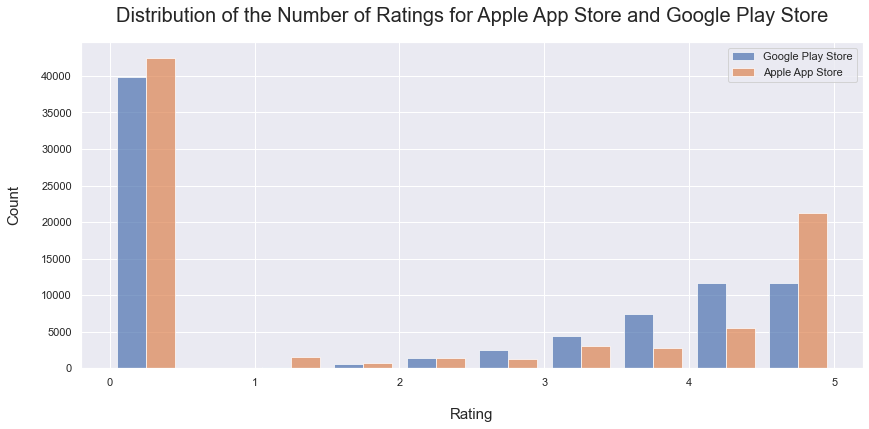

In [92]:
figure = plt.figure(figsize=(14, 6))
axis = plt.gca()
plt.hist([combined_apps['Google Rating'], combined_apps['Apple Rating']], alpha=0.7)
plt.xlabel('Rating', fontsize=15, labelpad=20)
plt.ylabel('Count', fontsize=15, labelpad=20)
plt.legend(['Google Play Store', 'Apple App Store'])
plt.title('Distribution of the Number of Ratings for Apple App Store and Google Play Store', fontsize=20, pad=20)
plt.show()

It appears that when we consider identical apps published on Google Play Store and Apple App Store, the latter has more apps that are not rated (0 rating) in addition to having more apps with a (near) 5 star rating! 

Why would the same app yield different ratings? 

As we explore this question, we will look at the reviews for these applications as well. 

In [93]:
combined_apps = combined_apps.sample(n=10000, random_state=42) 

In [94]:
combined_apps.to_csv('Apps Joined')

Before we proceeded, we used our scraper program to scrape (up to) 100 Google Play Store reviews for a selected sample of 10000 applications in the combined_apps data frame. That has already been done and the csv is stored as 'google_app_reviews.csv', so we can read it in with Pandas. We randomly sampled 10000 for this purpose because scraping 100 reviews for every application would take thousands of hours. 

Additionally, we could not scrape reviews on this scale from the Apple App Store, as our IP was blocked after only approximately ~500 reviews. 

We also used the TextBlob library to compute a sentiment polarity score for each review. 

Let's find apps with the largest differences in rating betweeen the Google App Store and the Apple App Store. 

In [95]:
combined_apps['Rating Difference'] = abs(combined_apps['Google Rating'] - combined_apps['Apple Rating'])

It appears that a large discrepancy can be caused if there are, say no ratings for the app on the Apple App Store but there is a 5 star rating on the Google Play Store. 

We will filter out such cases by considering apps that have at least 100 ratings in both stores. 

In [96]:
combined_apps_popular = combined_apps[(combined_apps['Google Rating Count'] > 100) & (combined_apps['Apple Rating Count'] > 100)].copy()
combined_apps_popular.sort_values(by=['Rating Difference'], ascending=False, inplace=True)

Let's analyze the top ten apps that have the highest rating differences between the two platforms

In [97]:
combined_apps_ten = combined_apps_popular.head(10)
combined_apps_ten

,App Id,App Name,Google Developer,Google Rating,Google Released,Google Rating Count,Apple Developer,Apple Rating,Apple Released,Apple Rating Count,Url Id,Developer,Rating Difference
53270,com.fanduel.scout,FanDuel Scout,FanDuel,1.8,"Sep 6, 2017",2228.0,"FanDuel, Inc.",4.73857,2017-09-07T00:47:41Z,13973,1275873422,"FanDuel, Inc.",2.93857
9760,co.mixcord.acapella,Acapella from PicPlayPost,Mixcord Inc,1.7,"Feb 5, 2016",2636.0,Mixcord Inc.,4.59440,2015-09-15T03:43:15Z,22870,924635678,Mixcord Inc.,2.89440
142522,com.kinetic.fit,Kinetic Fit,Kinetic.Fit,2.1,"Nov 2, 2016",1690.0,Kinetic,4.55866,2016-01-21T19:50:32Z,6879,1023388296,Kinetic,2.45866
6426,com.geniecompany.OHDAnywhere,OHD Anywhere,Overhead Door Corporation,2.6,"Dec 21, 2015",139.0,Overhead Door Corporation,4.79066,2016-01-21T09:38:49Z,578,1062400413,Overhead Door Corporation,2.19066
5267,com.pollardbanknote.PlayOnKS,Kansas Lottery PlayOn®,Pollard Banknote Limited,4.1,"Jan 24, 2017",951.0,Pollard Banknote Limited,2.08407,2017-01-25T08:11:49Z,226,1187363846,Pollard Banknote Limited,2.01593
66221,com.ombiel.campusm.mdc,Miami Dade College - My MDC,Miami Dade College Web Services,3.0,"Nov 28, 2017",184.0,Miami Dade College,4.93717,2017-11-28T15:56:16Z,191,1316082208,Miami Dade College,1.93717
59850,com.proxypics.app,ProxyPics,"ProxyPics, Inc",2.8,"Apr 23, 2018",237.0,"Proxy Pics, Inc",4.73247,2018-04-27T21:24:20Z,385,1330648241,"Proxy Pics, Inc",1.93247
82231,com.lipsar.cannondemolition,Cannon Demolition,Rollic Games,2.7,"Mar 2, 2021",2124.0,Rollic Games,4.52245,2020-11-14T08:00:00Z,11040,1539876612,Rollic Games,1.82245
36958,subway.schoox,University of SUBWAY®,"Schoox, Inc.",3.5,"Sep 15, 2015",1083.0,"Schoox, Inc.",1.68444,2015-09-15T20:58:56Z,225,1029153699,"Schoox, Inc.",1.81556
94078,com.prime.on,"PRIME Wire and Cable, Inc.","PRIME Wire and Cable, Inc.",2.9,"Apr 4, 2018",358.0,"Prime Wire and Cable, Inc.",4.70796,2018-04-22T08:08:21Z,452,1361292944,"Prime Wire and Cable, Inc.",1.80796


Wow! The highest app has a 2.93857 rating discrepancy! We note that there are a lot more ratings on the Apple App Store for this app, but the number of ratings on the Google Play Store is not small either. 

Looking at this list, it seems Apple has the higher rating for most of the apps. This supports the previously displayed graph -- there is a larger number of higher ratings on Apple's App Store. 

Before we proceeded, we scraped (up to) 100 reviews for each app in the combined_apps_ten dataframe from the Apple App Store. We've also computed a sentiment polarity score for each review using TextBlob. The csv is saved as 'apple_app_reviews.csv' so we can read it with Pandas. 

In [98]:
reviews_google = pd.read_csv('google_app_reviews.csv')
reviews_google.rename(columns={'app_id': 'App Id'}, errors='raise', inplace=True)

# Combine it with the larger dataframe that includes all the reviews, so we can get the rating
reviews_google_selected = combined_apps_ten.merge(reviews_google, on=['App Id'], how='inner')

In [99]:
reviews_apple_selected = pd.read_csv('apple_app_reviews.csv')
reviews_apple_selected.rename(columns={'app_id': 'App Id'}, errors='raise', inplace=True)

In [100]:
google_polarity_avg = reviews_google_selected.groupby(by=['App Id', 'App Name']).mean('Polarity')
apple_polarity_avg = reviews_apple_selected.groupby(by=['App Id']).mean('Polarity')

In [101]:
apple_polarity_avg.rename(columns={'score': 'Apple Score', 'Polarity': 'Apple Polarity'}, inplace=True)
apple_polarity_avg.drop(columns=['Unnamed: 0'], inplace=True)
apple_polarity_avg.reset_index(inplace=True)

In [102]:
google_polarity_avg.rename(columns={'score': 'Google Score', 'likes': 'Google Likes', 'Polarity': 'Google Polarity'}, inplace=True)
google_polarity_avg.drop(columns=['Unnamed: 0'], inplace=True)
google_polarity_avg.reset_index(inplace=True)

In [103]:
polarity_combined = google_polarity_avg.merge(apple_polarity_avg, on='App Id', how='inner')

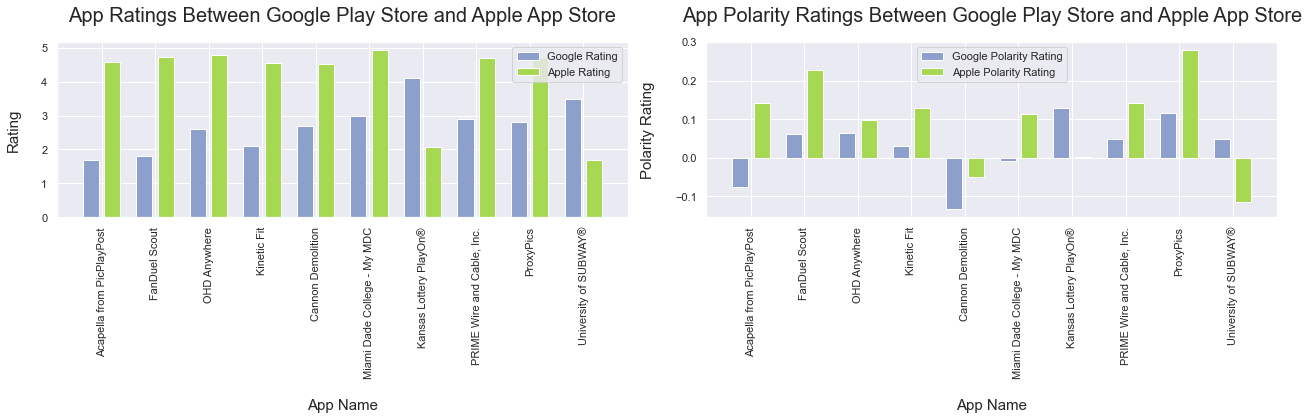

In [168]:
figure, (axis_1, axis_2) = plt.subplots(1, 2, figsize=(18, 6))

# Inspired from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
x = np.arange(10)
width = 0.3
google_ratings = polarity_combined['Google Rating']
apple_ratings = polarity_combined['Apple Rating']

google_polarities = polarity_combined['Google Polarity']
apple_polarities = polarity_combined['Apple Polarity']

axis_1.set_xlabel('App Name', fontsize=15, labelpad=20)
axis_1.set_ylabel('Rating', fontsize=15, labelpad=20)
axis_1.set_title('App Ratings Between Google Play Store and Apple App Store', fontsize=20, pad=20)

axis_1.bar(x-0.2, google_ratings, width, label='Google Rating', color=palette[2])
axis_1.bar(x+0.2, apple_ratings, width, label='Apple Rating', color=palette[4])
axis_1.legend()

axis_2.set_xlabel('App Name', fontsize=15, labelpad=20)
axis_2.set_ylabel('Polarity Rating', fontsize=15, labelpad=20)
axis_2.set_title('App Polarity Ratings Between Google Play Store and Apple App Store', fontsize=20, pad=20)

axis_2.bar(x-0.2, google_polarities, width, label='Google Polarity Rating', color=palette[2])
axis_2.bar(x+0.2, apple_polarities, width, label='Apple Polarity Rating', color=palette[4])
axis_2.legend()

axis_1.set_xticks(ticks=polarity_combined.index)
axis_1.set_xticklabels(labels=polarity_combined['App Name'],
                       rotation=90)

axis_2.set_xticks(ticks=polarity_combined.index)
axis_2.set_xticklabels(labels=polarity_combined['App Name'], 
                       rotation=90)

# From https://www.kite.com/python/answers/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python
figure.tight_layout()

Comparing the sentiment polarities and the ratings, we can see that the lower the rating the lower the sentiment polarity.

In almost all these apps, it is rated lower on the Google Play Store. As a consequence, the polarity is lower too. 

Let's take a closer look at some of the reviews for FanDuel Scout -- the app with the largest rating discrepancy between the two platforms. 

In [105]:
fanduel_google = reviews_google[reviews_google['App Id'] == 'com.fanduel.scout'].copy()
fanduel_google.sort_values(by=['likes'], ascending=False, inplace=True)
fanduel_google[['content', 'likes']].head(5)

,content,likes
116563,I can't even use the app right now. I'm trying...,53
116505,"When it works it's great, BUT just like everyo...",51
116504,It never has the correct info for my login. I ...,50
116531,App keeps signing me out even though i'm signe...,37
116518,I would give it ZERO stars if it allowed me to...,35


Taking a look at the top three most-liked reviews, it seems that the poor reviews stem from usability of the application and the lack of resolution. 

When we look at the same app on the Apple App Store: (There is no option to 'like' reviews on the Apple App Store so we cannot sort by likes)

In [106]:
fanduel_apple = reviews_apple_selected[(reviews_apple_selected['App Id'] == 'com.fanduel.scout')].copy()
fanduel_apple.head(5)

,Unnamed: 0,App Id,user_name,score,content,Polarity
59,59,com.fanduel.scout,crankyspants,5,And if I play against friends it's more fun. N...,0.262500
60,60,com.fanduel.scout,kingofpharaohs11,1,Had this app for a couple months and it’s terr...,-0.090546
61,61,com.fanduel.scout,TheRaceman,4,This is a really good app. It’s 5 star qualit...,0.066667
62,62,com.fanduel.scout,dmballer,5,"Very up to date on player info, at a great app...",0.468750
63,63,com.fanduel.scout,Letsch11,1,Worthless app as the players never load. Throu...,-0.046032


Indeed, there are 1-star reviews as well that are releated to the (lack of) usability of the app. 

We proceed to make visualziation of the the distribution of reviews for this app:

In [107]:
count_fanduel_apple = fanduel_apple.groupby(by=['score']).count().reset_index()
count_fanduel_google = fanduel_google.groupby(by=['score']).count().reset_index()

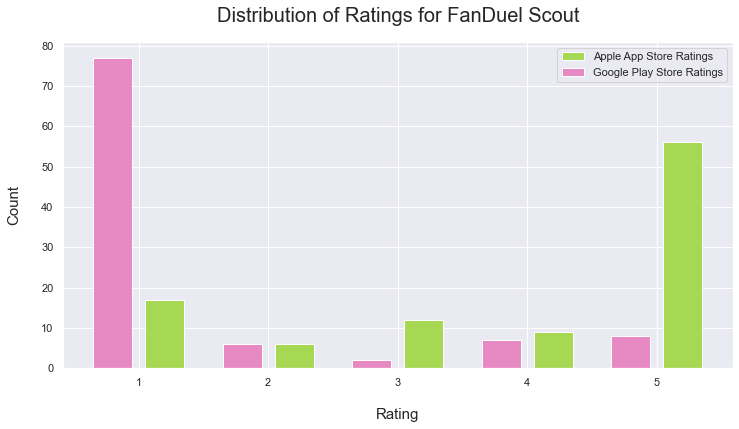

In [144]:
figure = plt.figure(figsize=(12,6))
axis = plt.gca()

apple_fanduel = count_fanduel_apple['App Id'] # This is the count
google_fanduel = count_fanduel_google['App Id']

# Inspired from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
x = np.arange(5)
width = 0.3

axis.bar(x+0.2, apple_fanduel, width, label='Apple App Store Ratings', color=palette[4])
axis.bar(x-0.2, google_fanduel, width, label='Google Play Store Ratings', color=palette[3])
axis.legend()

axis.set_xlabel('Rating', fontsize=15, labelpad=20)
axis.set_ylabel('Count', fontsize=15, labelpad=20)
axis.set_title('Distribution of Ratings for FanDuel Scout', fontsize=20, pad=20)

axis.set_xticks(ticks=count_fanduel_google.index)
axis.set_xticklabels(labels=count_fanduel_google['score'])

plt.show()

We can see that there is an overwhelming number of 1-star reviews on the Google Play Store for FanDuel Scout. 

Perhaps the app malfunctions on the Android platform more often than on iOS. 

We return to our dataframe of google reviews and take a look at the most liked 1-star ratings. 

In [109]:
reviews_google = reviews_google[reviews_google['score'] > 0].copy()
reviews_google.sort_values(by=['score', 'likes'], ascending=[True, False], inplace=True)
reviews_google.head()

,Unnamed: 0,App Id,user_name,score,content,likes,Polarity
11583,11583,com.nextwave.battleofchepauk2,Darshan N,1,when i saw next wave multimedia(developers of ...,5512,-0.038788
56084,56084,com.astragon.cs2014,Glass Whisper,1,🤪 Even though I spent a little money in this s...,5089,0.011607
13300,13300,com.budgestudios.HelloKittyNailSalon,Marina C,1,Love Hello Kitty but this game gave me a sour ...,4261,0.100649
123654,123654,com.blendergame.smash,D.Marie Medlin,1,Cool and fun game. The only thing that's not f...,4019,-0.254545
118145,118145,com.colorup.game,Dan Bolivar,1,"Give me a break, advertisement after advertise...",3941,-0.162245


It appears that the most liked 1-star reviews stem from annoyance due to advertisements and game usabilitity. 

Next we will investigate if there is a correlation between average review sentiment polarity and the rating of the app. 

In [110]:
reviews_google = reviews_google.merge(google_apps, on=['App Id'], how='inner')

grouped_reviews_google = reviews_google.groupby(by=['App Id', 'Google Rating']).agg(mean_polarity=('Polarity', 'mean'), mean_score=('score', 'mean'))
grouped_reviews_google.reset_index(inplace=True)

In [111]:
grouped_reviews_google =  grouped_reviews_google[grouped_reviews_google['Google Rating'] > 0].copy()

In [112]:
r, p = stats.pearsonr(grouped_reviews_google['mean_polarity'], grouped_reviews_google['mean_score'])
r, p

(0.6256581414419669, 0.0)

And as expected, we observe a linear association between rating and sentiment polarity. We are confident in this claim due to the miniscule pvalue.

Let's see a scatter plot with a best-fit line. 

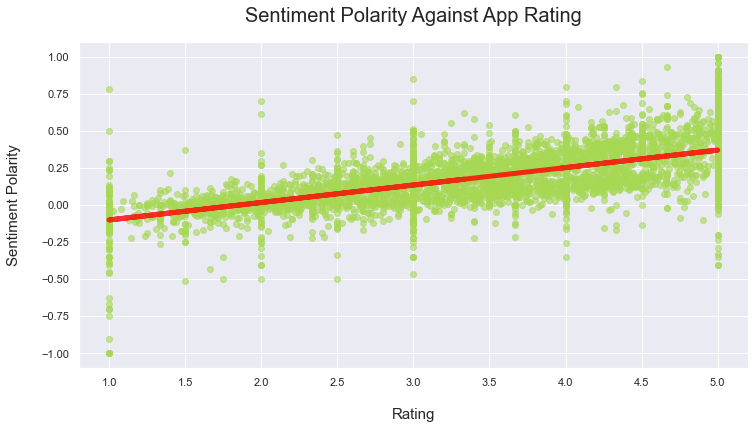

In [146]:
figure = plt.figure(figsize=(12, 6))
axis = plt.gca()

plt.scatter(grouped_reviews_google['mean_score'], grouped_reviews_google['mean_polarity'], alpha=0.6, color=palette[4])
axis.set_xlabel(xlabel='Rating', fontsize=15, labelpad=20)
axis.set_ylabel(ylabel='Sentiment Polarity', fontsize=15, labelpad=20)
axis.set_title(label='Sentiment Polarity Against App Rating', fontsize=20, pad=20)

fit = stats.linregress(grouped_reviews_google['mean_score'], grouped_reviews_google['mean_polarity'])
grouped_reviews_google['prediction'] = fit.slope*grouped_reviews_google['mean_score'] + fit.intercept
plt.plot('mean_score', 'prediction', data=grouped_reviews_google, color='red', linewidth=5, alpha=0.8)
plt.show()

Why are there still data comments with negative sentiments if they've received a rating of 5-stars? Let's investigate that. 

In [114]:
# From https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column
# Categorize polarity values into sentiments
conditions = [
    reviews_google['Polarity'] > 0,
    reviews_google['Polarity'] < 0,
    reviews_google['Polarity'] == 0
]

sentiments = ['positive', 'negative', 'neutral']
reviews_google['Sentiment'] = np.select(conditions, sentiments, default='neutral')

In [115]:
five_star_reviews = reviews_google[reviews_google['score'] == 5]
five_star_reviews = five_star_reviews[five_star_reviews['Sentiment'] == 'negative']
five_star_reviews.head(5)

,Unnamed: 0,App Id,user_name,score,content,likes,Polarity,App Name,Google Developer,Google Rating,Google Released,Google Rating Count,Sentiment
55,11596,com.nextwave.battleofchepauk2,AV S,5,1) Game should get balls fast towards ball 2) ...,3450,-0.164062,CSK Battle Of Chepauk 2,Nextwave Multimedia,4.4,"Apr 26, 2018",185149.0,negative
62,11528,com.nextwave.battleofchepauk2,Rameah Ramasamy,5,love this game .But 5 changes Have come to thi...,571,-0.120833,CSK Battle Of Chepauk 2,Nextwave Multimedia,4.4,"Apr 26, 2018",185149.0,negative
83,11550,com.nextwave.battleofchepauk2,Hanmantha Raju,5,Only one problem in this game. That is when we...,6,-0.072222,CSK Battle Of Chepauk 2,Nextwave Multimedia,4.4,"Apr 26, 2018",185149.0,negative
86,11578,com.nextwave.battleofchepauk2,Lilly rani Lilly rani,5,This game so super game but no bowling and no ...,6,-0.013333,CSK Battle Of Chepauk 2,Nextwave Multimedia,4.4,"Apr 26, 2018",185149.0,negative
91,11580,com.nextwave.battleofchepauk2,RAGUNATH BOOPATHI,5,A good game when you need to play only one sid...,2,-0.166667,CSK Battle Of Chepauk 2,Nextwave Multimedia,4.4,"Apr 26, 2018",185149.0,negative


It seems like all the 5-star reviews are clearly positive comments, but their in-game suggestions are interpreted as having negative sentiment. 

We will finish off this section by cheking if the mean polarity is different for the different review scores. 

In [116]:
one_star_reviews = reviews_google[reviews_google['score'] == 1]
two_star_reviews = reviews_google[reviews_google['score'] == 2]
three_star_reviews = reviews_google[reviews_google['score'] == 3]
four_star_reviews = reviews_google[reviews_google['score'] == 4]

In [117]:
f_oneway(one_star_reviews['Polarity'], 
         two_star_reviews['Polarity'],
         three_star_reviews['Polarity'], 
         four_star_reviews['Polarity'], 
         five_star_reviews['Polarity'])

F_onewayResult(statistic=3893.8691249884187, pvalue=0.0)

With a pvalue of (virtually) 0, we can conclude that at least one of the means are different. We explore further with Tukey's test to see which means are different.

In [118]:
results = pairwise_tukeyhsd(reviews_google['Polarity'], reviews_google['score'])._results_table
results

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.1011,0.001,0.0925,0.1097,True
1,3,0.1745,0.001,0.1663,0.1828,True
1,4,0.2806,0.001,0.2731,0.2881,True
1,5,0.4202,0.001,0.4151,0.4253,True
2,3,0.0734,0.001,0.0629,0.0839,True
2,4,0.1795,0.001,0.1696,0.1894,True
2,5,0.3191,0.001,0.3108,0.3274,True
3,4,0.106,0.001,0.0965,0.1156,True
3,5,0.2457,0.001,0.2378,0.2535,True
4,5,0.1396,0.001,0.1326,0.1467,True


We can see that the means between every pair of group is different at an alpha of 0.05. The mean sentiment polarity between say, a rating of 4 and a rating of 5, is clearly distinguishable in this case. 

Next, we will explore the relationship between the number of likes that a review obtains and its sentiment polarity: are users more likely to 'thumbs up' reviews that are more postive or more negative? 

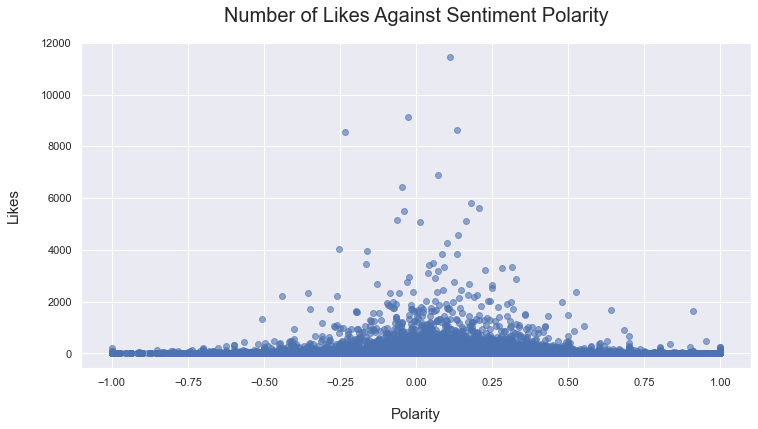

In [119]:
figure = plt.figure(figsize=(12, 6))
axis = plt.gca()

plt.scatter(reviews_google['Polarity'], reviews_google['likes'], color=alpha=0.6)
axis.set_xlabel(xlabel='Polarity', fontsize=15, labelpad=20)
axis.set_ylabel(ylabel='Likes', fontsize=15, labelpad=20)
axis.set_title(label='Number of Likes Against Sentiment Polarity', fontsize=20, pad=20)

plt.show()

From the scatter plot, we can see that the most liked reviews are around 'neutral' in sentiment. 

Let's plot a distrubtion of sentiment polarities. 

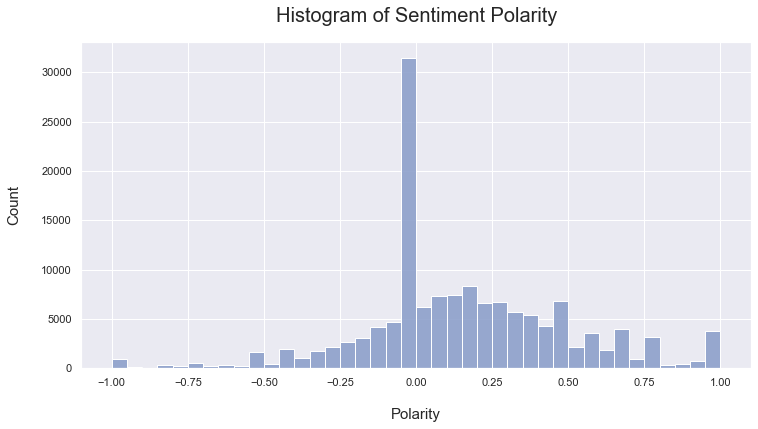

In [167]:
figure = plt.figure(figsize=(12, 6))
axis = plt.gca()

sns.histplot(reviews_google['Polarity'], binwidth=0.05, alpha=0.9, color=palette[2])
axis.set_xlabel(xlabel='Polarity', fontsize=15, labelpad=20)
axis.set_ylabel(ylabel='Count', fontsize=15, labelpad=20)
axis.set_title(label='Histogram of Sentiment Polarity', fontsize=20, pad=20)

plt.show()


We see that an overwhelming majority of reviewshave a neutral sentiment polarity, which explains why they are the most liked!

Next, we will explore if a reviewer gives different reviews. We will consider users who have left more than 5 reviews. 

In [202]:
users = reviews_google.groupby(by=['user_name', 'score']).agg(num_reviews=('content', 'count'))
users = users[users['num_reviews'] > 5]
users.reset_index(inplace=True)

# Remove anonymous name
users = users[users['user_name'] != 'A Google user']

In [203]:
users['full_score'] = users['score'] * users['num_reviews']

users_grouped = users.groupby(by=['user_name']).agg(total_reviews=('num_reviews', 'sum'), 
                                                    total_full_score=('full_score', 'sum'))
users_grouped.reset_index(inplace=True)

In [204]:
users_grouped['average_score'] = users_grouped['total_full_score'] / users_grouped['total_reviews']

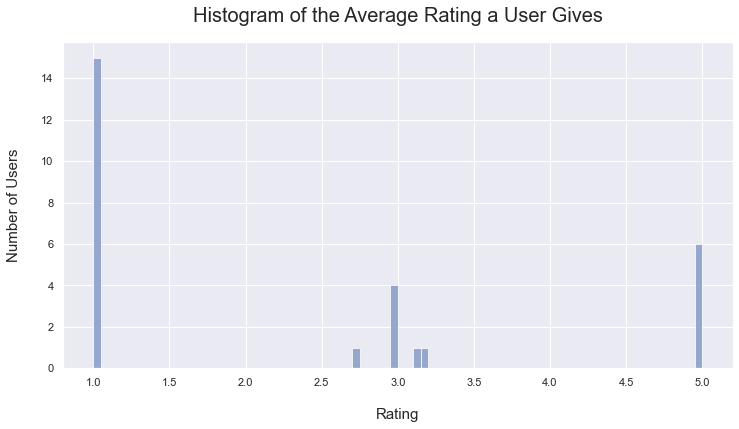

In [206]:
figure = plt.figure(figsize=(12, 6))
axis = plt.gca()

sns.histplot(users_grouped['average_score'], binwidth=0.05, alpha=0.9, color=palette[2])
axis.set_xlabel(xlabel='Rating', fontsize=15, labelpad=20)
axis.set_ylabel(ylabel='Number of Users', fontsize=15, labelpad=20)
axis.set_title(label='Histogram of the Average Rating a User Gives', fontsize=20, pad=20)

plt.show()

We can see that the average user rating is either very low or very high. There are more users who *solely* give negative ratings than users who *solely* give positive ones. Very few give a mixture of positive and negative ratings. 

We speculate that a user has more incentive to rate an application if it is either exemplary or deplorable. If it's somewhere in between, they may not have much to say and hence, refrain from reviewing. 

We acknowledge the limitation of this small sample size, however. It is not representative of the entire data set. Additionally, two users apparently are allowed to have the same user name!